# FAKE NEWS CLASSIFIER 
# - Aikanshi Vaish

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import os
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
import io
import os
import sys

In [3]:
sys.path

['C:\\Users\\aikan\\OneDrive\\Desktop\\Fake-News-Classifier-main',
 'C:\\Users\\aikan\\anaconda3\\python39.zip',
 'C:\\Users\\aikan\\anaconda3\\DLLs',
 'C:\\Users\\aikan\\anaconda3\\lib',
 'C:\\Users\\aikan\\anaconda3',
 '',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\aikan\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\aikan\\.ipython']

In [4]:
!pip install wordcloud

### Data Overview

In [5]:
df= pd.read_csv('data.csv')
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [7]:
df.shape, df.size

((4009, 4), 16036)

## EDA 

In [8]:
df.drop('URLs', inplace= True, axis= 1)
df.dropna(inplace= True)
df

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...
4003,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4007,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [9]:
## Shape and size after dropping null value and extra columns:
df.shape, df.size

((3988, 3), 11964)

Text(0.5, 1.0, 'Fake Vs Real news')

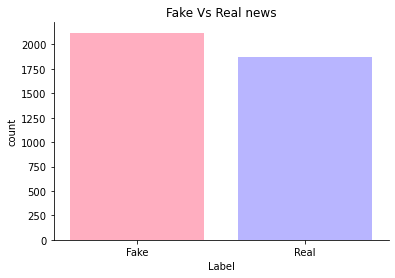

In [10]:
sns.countplot(x='Label', 
              data=df,
              palette=['#ffaec0', '#b8b5ff'],
              saturation=1)
sns.despine()
plt.xticks([0,1], ['Fake', 'Real'])
plt.title('Fake Vs Real news')

In [11]:
### Count of real and fake values::
df.Label.value_counts()

0    2120
1    1868
Name: Label, dtype: int64

### Text analysis & Clean-Up

In [12]:
### we need a target ie will be our headline + body text
df['Text']= df['Headline']+ ' ' + df['Body']

In [13]:
df['Length']=df['Text'].apply(len)

In [14]:
df.groupby('Label').describe()

Length                                                             \
        count         mean          std    min      25%     50%      75%   
Label                                                                      
0      2120.0  2457.573585  2989.973011  110.0   260.75  1598.5  3539.25   
1      1868.0  3620.605460  3057.972872  120.0  1561.50  2912.0  5064.00   

                
           max  
Label           
0      32859.0  
1      32811.0

<AxesSubplot:ylabel='Frequency'>

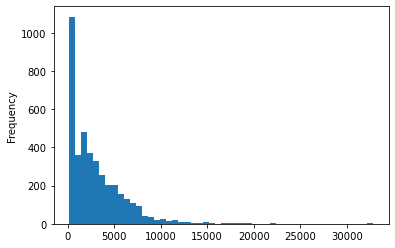

In [15]:
df['Length'].plot(bins=50, kind= 'hist')

In [16]:
to_drop= ['Headline', 'Body', 'Length']
df.drop(to_drop, axis= 1, inplace= True)
df.head(10)

,Label,Text
0,1,Four ways Bob Corker skewered Donald Trump Ima...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tribute Co...
5,0,JetNation FanDuel League; Week 4 JetNation Fan...
6,1,Kansas Tried a Tax Plan Similar to Trump’s. It...
7,1,"India RBI chief: growth important, but not at ..."
8,1,EPA chief to sign rule on Clean Power Plan exi...
9,1,Talks on sale of Air Berlin planes to easyJet ...


### STOPWORDS removal and Lemmatization

In [17]:
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordcloud')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aikan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aikan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


False

In [19]:
sw= stopwords.words('english')
extras= ["would"]
sw.append("would")
sw.append("could")
sw.append("one")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
lm = WordNetLemmatizer()
def clean_text(column):
    corpus = []
    for value in column:
        # convert each word into lower case
        value = value.lower()
        value = value.split()
        # lemmatizing those words which are not stop words
        value = [lm.lemmatize(word, pos="v") for word in value if word not in sw]
        corpus.append(' '.join(value))
    return corpus    

In [21]:
df['Text']= clean_text(df.Text)


In [22]:
## Checking a sample cleanup
df.Text[3]

"egypt's cheiron win tie-up pemex mexican onshore oil field mexico city (reuters) - egypt’s cheiron hold limit right partner mexican national oil company pemex onshore cardenas-mora project, industry regulator say wednesday. tie-up mark second joint venture pemex equity partner since energy open finalize 2014 end company’s decades-long monopoly allow develop project private foreign oil companies. cardenas-mora 65-square-mile (168 sq km) field locate tabasco state believe contain 93 million barrel oil equivalent (boe) proven, probable possible reserves."

### Custom exploring

In [23]:
import re   # importing regular expression function
def clean_data(input):
    corpus=[]
    for value in input:
        value= value.lower()
        value= re.sub(r'[^\w\s]','', value)
        value= re.sub(r'[^a-zA-Z]',' ', value)
        value= re.sub('aa[a]*','a', value)
        value= re.sub(r"http\S+", "", value)
        value = re.sub(r'\<a href', ' ', value)
        value = re.sub(r'[_"\;%()|+&=*%.,!?:#$@\[\]/]', ' ', value)
        value= re.sub('-', ' ', value)
        value= re.sub('\d+', '', value)
        value= re.sub('\s\s+',' ', value)
        value= re.sub('\n', '', value)
        value= re.sub('<[^>]*>', '', value)
        corpus.append(''.join(value))
    return corpus


In [24]:
df['Text']=clean_data(df.Text)


In [25]:
##Sample checking
df.Text[3]

'egypts cheiron win tieup pemex mexican onshore oil field mexico city reuters egypts cheiron hold limit right partner mexican national oil company pemex onshore cardenasmora project industry regulator say wednesday tieup mark second joint venture pemex equity partner since energy open finalize end companys decadeslong monopoly allow develop project private foreign oil companies cardenasmora squaremile sq km field locate tabasco state believe contain million barrel oil equivalent boe proven probable possible reserves'

### Visualization using WORD CLOUD

In [26]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fake_news = df[df.Label == 0]
real_news = df[df.Label == 1]

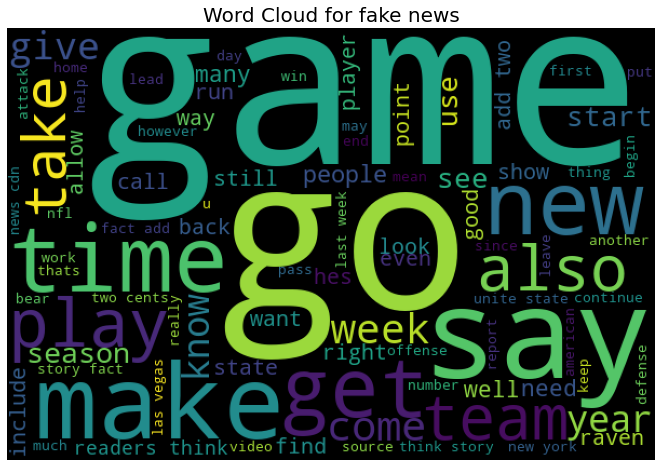

In [28]:
# wordcloud for fake news
fake_wc = WordCloud(width = 600, height = 400, 
                    background_color ='black', 
                    stopwords = stopwords.words('english'), 
                    min_font_size = 10).generate(' '.join(fake_news.Text)) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(fake_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for fake news', fontsize=20);

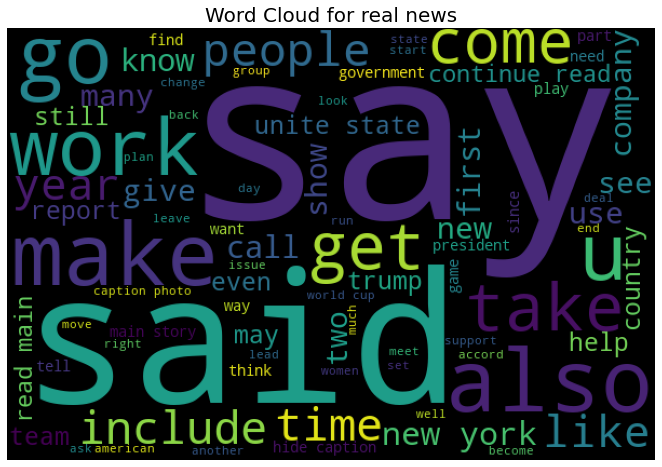

In [29]:
# wordcloud for REAL news
real_wc = WordCloud(width = 600, height = 400, 
                    background_color ='black', 
                    stopwords = stopwords.words('english'), 
                    min_font_size = 10).generate(' '.join(real_news.Text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(real_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for real news', fontsize=20);

### Train-Test_Split

In [30]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test)= train_test_split(df['Text'], df['Label'], test_size= 0.33, random_state= 0, stratify=df['Label'])

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2671,), (1317,), (2671,), (1317,))

## Count Vectorizer / Bag of Words 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_train_cv= cv.fit_transform(X_train)
X_test_cv= cv.transform(X_test)

### getting feature values and feature names

In [33]:
cv.get_feature_names()

['ab',
 'aba',
 'ababacar',
 'aback',
 'abadi',
 'abadis',
 'abandon',
 'abandoned',
 'abandonment',
 'abaqus',
 'abate',
 'abating',
 'abattoir',
 'abaya',
 'abb',
 'abbado',
 'abbas',
 'abbatevia',
 'abbattoir',
 'abbey',
 'abbeystyle',
 'abbie',
 'abbott',
 'abbotts',
 'abbreviate',
 'abbvie',
 'abbvies',
 'abby',
 'abbys',
 'abc',
 'abcnews',
 'abcs',
 'abdallah',
 'abdel',
 'abdelaty',
 'abdelaziz',
 'abdelkader',
 'abdelmalek',
 'abdomen',
 'abdomens',
 'abdominal',
 'abdrabbu',
 'abduba',
 'abduct',
 'abducted',
 'abduction',
 'abductions',
 'abdul',
 'abdulaziz',
 'abdulhamit',
 'abduljabbar',
 'abdullah',
 'abdullahfile',
 'abdulrahman',
 'abe',
 'abel',
 'abell',
 'abemaciclib',
 'abemc',
 'abenomics',
 'aberavon',
 'aberdeen',
 'aberrant',
 'aberration',
 'abertis',
 'abertiss',
 'abes',
 'abet',
 'abfl',
 'abhor',
 'abhorrent',
 'abibr',
 'abide',
 'abidifile',
 'abigail',
 'abilities',
 'ability',
 'abingdon',
 'abject',
 'abkarian',
 'able',
 'ably',
 'abnormal',
 'abnorm

## Machine learning algorithms for Modelling.

### LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
import pickle
Log_Reg=LogisticRegression(solver='liblinear',random_state=0)

In [35]:
model= Log_Reg.fit(X_train_cv, y_train)

In [36]:
Log_Reg.predict(X_test_cv)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
y_predicted= Log_Reg.predict(X_test_cv)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_predicted)

array([[677,  23],
       [ 16, 601]], dtype=int64)

In [39]:
accuracy_score(y_test, y_predicted)

0.9703872437357631

In [40]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       700
           1       0.96      0.97      0.97       617

    accuracy                           0.97      1317
   macro avg       0.97      0.97      0.97      1317
weighted avg       0.97      0.97      0.97      1317



In [41]:
print('Test score with Logistic regression is', accuracy_score(y_test, y_predicted))

Test score with Logistic regression is 0.9703872437357631


### DECISION TREE CLASSIFIER

In [42]:
from sklearn.tree import DecisionTreeClassifier
Dtc= DecisionTreeClassifier(criterion= 'entropy')

In [43]:
model= Dtc.fit(X_train_cv, y_train)
model.predict(X_test_cv)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
y_pred= model.predict(X_test_cv)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[664,  36],
       [ 29, 588]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       700
           1       0.94      0.95      0.95       617

    accuracy                           0.95      1317
   macro avg       0.95      0.95      0.95      1317
weighted avg       0.95      0.95      0.95      1317



In [47]:
accuracy_score(y_test, y_pred)

0.9506454062262718

### NAIVE BAYES APPROACH

In [48]:
from sklearn.naive_bayes import MultinomialNB
NBmodel= MultinomialNB()

In [49]:
model3=NBmodel.fit(X_train_cv, y_train)

In [50]:
y_predNB=model3.predict(X_test_cv)

In [51]:
all_predictions=NBmodel.predict(X_test_cv)
all_predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [52]:
confusion_matrix(y_test, y_predNB)

array([[645,  55],
       [ 20, 597]], dtype=int64)

In [53]:
accuracy_score(y_test, y_predNB)

0.9430523917995444

In [54]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       700
           1       0.92      0.97      0.94       617

    accuracy                           0.94      1317
   macro avg       0.94      0.94      0.94      1317
weighted avg       0.94      0.94      0.94      1317



## TF-IDF VECTORIZATION METHOD

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
features= cv.get_feature_names()
features

['ab',
 'aba',
 'ababacar',
 'aback',
 'abadi',
 'abadis',
 'abandon',
 'abandoned',
 'abandonment',
 'abaqus',
 'abate',
 'abating',
 'abattoir',
 'abaya',
 'abb',
 'abbado',
 'abbas',
 'abbatevia',
 'abbattoir',
 'abbey',
 'abbeystyle',
 'abbie',
 'abbott',
 'abbotts',
 'abbreviate',
 'abbvie',
 'abbvies',
 'abby',
 'abbys',
 'abc',
 'abcnews',
 'abcs',
 'abdallah',
 'abdel',
 'abdelaty',
 'abdelaziz',
 'abdelkader',
 'abdelmalek',
 'abdomen',
 'abdomens',
 'abdominal',
 'abdrabbu',
 'abduba',
 'abduct',
 'abducted',
 'abduction',
 'abductions',
 'abdul',
 'abdulaziz',
 'abdulhamit',
 'abduljabbar',
 'abdullah',
 'abdullahfile',
 'abdulrahman',
 'abe',
 'abel',
 'abell',
 'abemaciclib',
 'abemc',
 'abenomics',
 'aberavon',
 'aberdeen',
 'aberrant',
 'aberration',
 'abertis',
 'abertiss',
 'abes',
 'abet',
 'abfl',
 'abhor',
 'abhorrent',
 'abibr',
 'abide',
 'abidifile',
 'abigail',
 'abilities',
 'ability',
 'abingdon',
 'abject',
 'abkarian',
 'able',
 'ably',
 'abnormal',
 'abnorm

In [56]:
X_train_tfidf= tfidf.fit_transform(X_train).toarray()
df_tfidf= pd.DataFrame(X_train_tfidf, columns= features)
print(round(df_tfidf, ndigits=2))
X_test_tfidf= tfidf.transform(X_test)

        ab  aba  ababacar  aback  abadi  abadis  abandon  abandoned  \
0     0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
1     0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
2     0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
3     0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
4     0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
...    ...  ...       ...    ...    ...     ...      ...        ...   
2666  0.16  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
2667  0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
2668  0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
2669  0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   
2670  0.00  0.0       0.0    0.0    0.0     0.0      0.0        0.0   

      abandonment  abaqus  ...  zuppa  zuppiger  zuptas  zurawski  zurcher  \
0             0.0     0.0  ...    0.0       0.0     0.0       0.0    

In [57]:
y= df.Label.values

In [58]:
X_train_tfidf.shape, X_test_tfidf.shape, y_train.shape, y_test.shape

((2671, 40253), (1317, 40253), (2671,), (1317,))

### LOGISTIC REGRESSION

In [59]:
model= Log_Reg.fit(X_train_tfidf, y_train)

In [60]:
y_pred=model.predict(X_test_tfidf)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       700
           1       0.96      0.97      0.96       617

    accuracy                           0.96      1317
   macro avg       0.96      0.96      0.96      1317
weighted avg       0.96      0.96      0.96      1317



In [62]:
from sklearn.metrics import accuracy_score

In [63]:
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.964


In [64]:
confusion_matrix(y_test, y_pred)

array([[672,  28],
       [ 19, 598]], dtype=int64)

In [65]:
filename = 'pickled_2.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_tfidf, y_test)
print(result)

0.9643128321943811


### DECISION TREE CLASSIFIER

In [66]:
model= Dtc.fit(X_train_tfidf, y_train)


In [67]:
y_pred= model.predict(X_test_tfidf)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       700
           1       0.95      0.94      0.95       617

    accuracy                           0.95      1317
   macro avg       0.95      0.95      0.95      1317
weighted avg       0.95      0.95      0.95      1317



In [69]:
confusion_matrix(y_test, y_pred)

array([[671,  29],
       [ 34, 583]], dtype=int64)

In [70]:
accuracy_score(y_test, y_pred)

0.9521640091116174

### NAIVE BAYES APPROACH

In [71]:
from sklearn.naive_bayes import MultinomialNB
NBmodel= MultinomialNB()

In [72]:
NBmodel.fit(X_train_tfidf, y_train)

MultinomialNB()

In [73]:
y_prediction= NBmodel.predict(X_test_tfidf)

In [74]:
confusion_matrix(y_test, y_prediction)

array([[631,  69],
       [ 25, 592]], dtype=int64)

In [75]:
accuracy_score(y_test, y_prediction)

0.9286256643887624

In [76]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       700
           1       0.90      0.96      0.93       617

    accuracy                           0.93      1317
   macro avg       0.93      0.93      0.93      1317
weighted avg       0.93      0.93      0.93      1317



## BEST MODEL TO BE CONSIDERED ON BASIS OF ACCURACY SCORE is Bag of words with Logistic regressor giving an accuracy of 97.03%

In [77]:
## Best pipeline will be 

Log_Reg= LogisticRegression()
model= Log_Reg.fit(X_train_cv, y_train)
model.predict(X_test_cv)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [78]:
accuracy_score(y_test, y_predicted)

0.9703872437357631

### Creating a Pickle file for Best Model for deployment Use

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_full= cv.fit_transform(df['Text'])

In [80]:
from sklearn.linear_model import LogisticRegression
import pickle
Log_Reg=LogisticRegression(solver='liblinear',random_state=0)

In [81]:
model= Log_Reg.fit(X_full, df['Label'])

In [82]:
with open('final_model_1509.pkl', 'wb') as f:
    pickle.dump(model, f)

In [83]:
cv= CountVectorizer()

In [84]:
with open('cv_vec_1509.pkl', 'wb') as f:
    pickle.dump(cv, f)